In [2]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from database import Database
from datetime import datetime, timedelta
import seaborn as sns
db = Database()

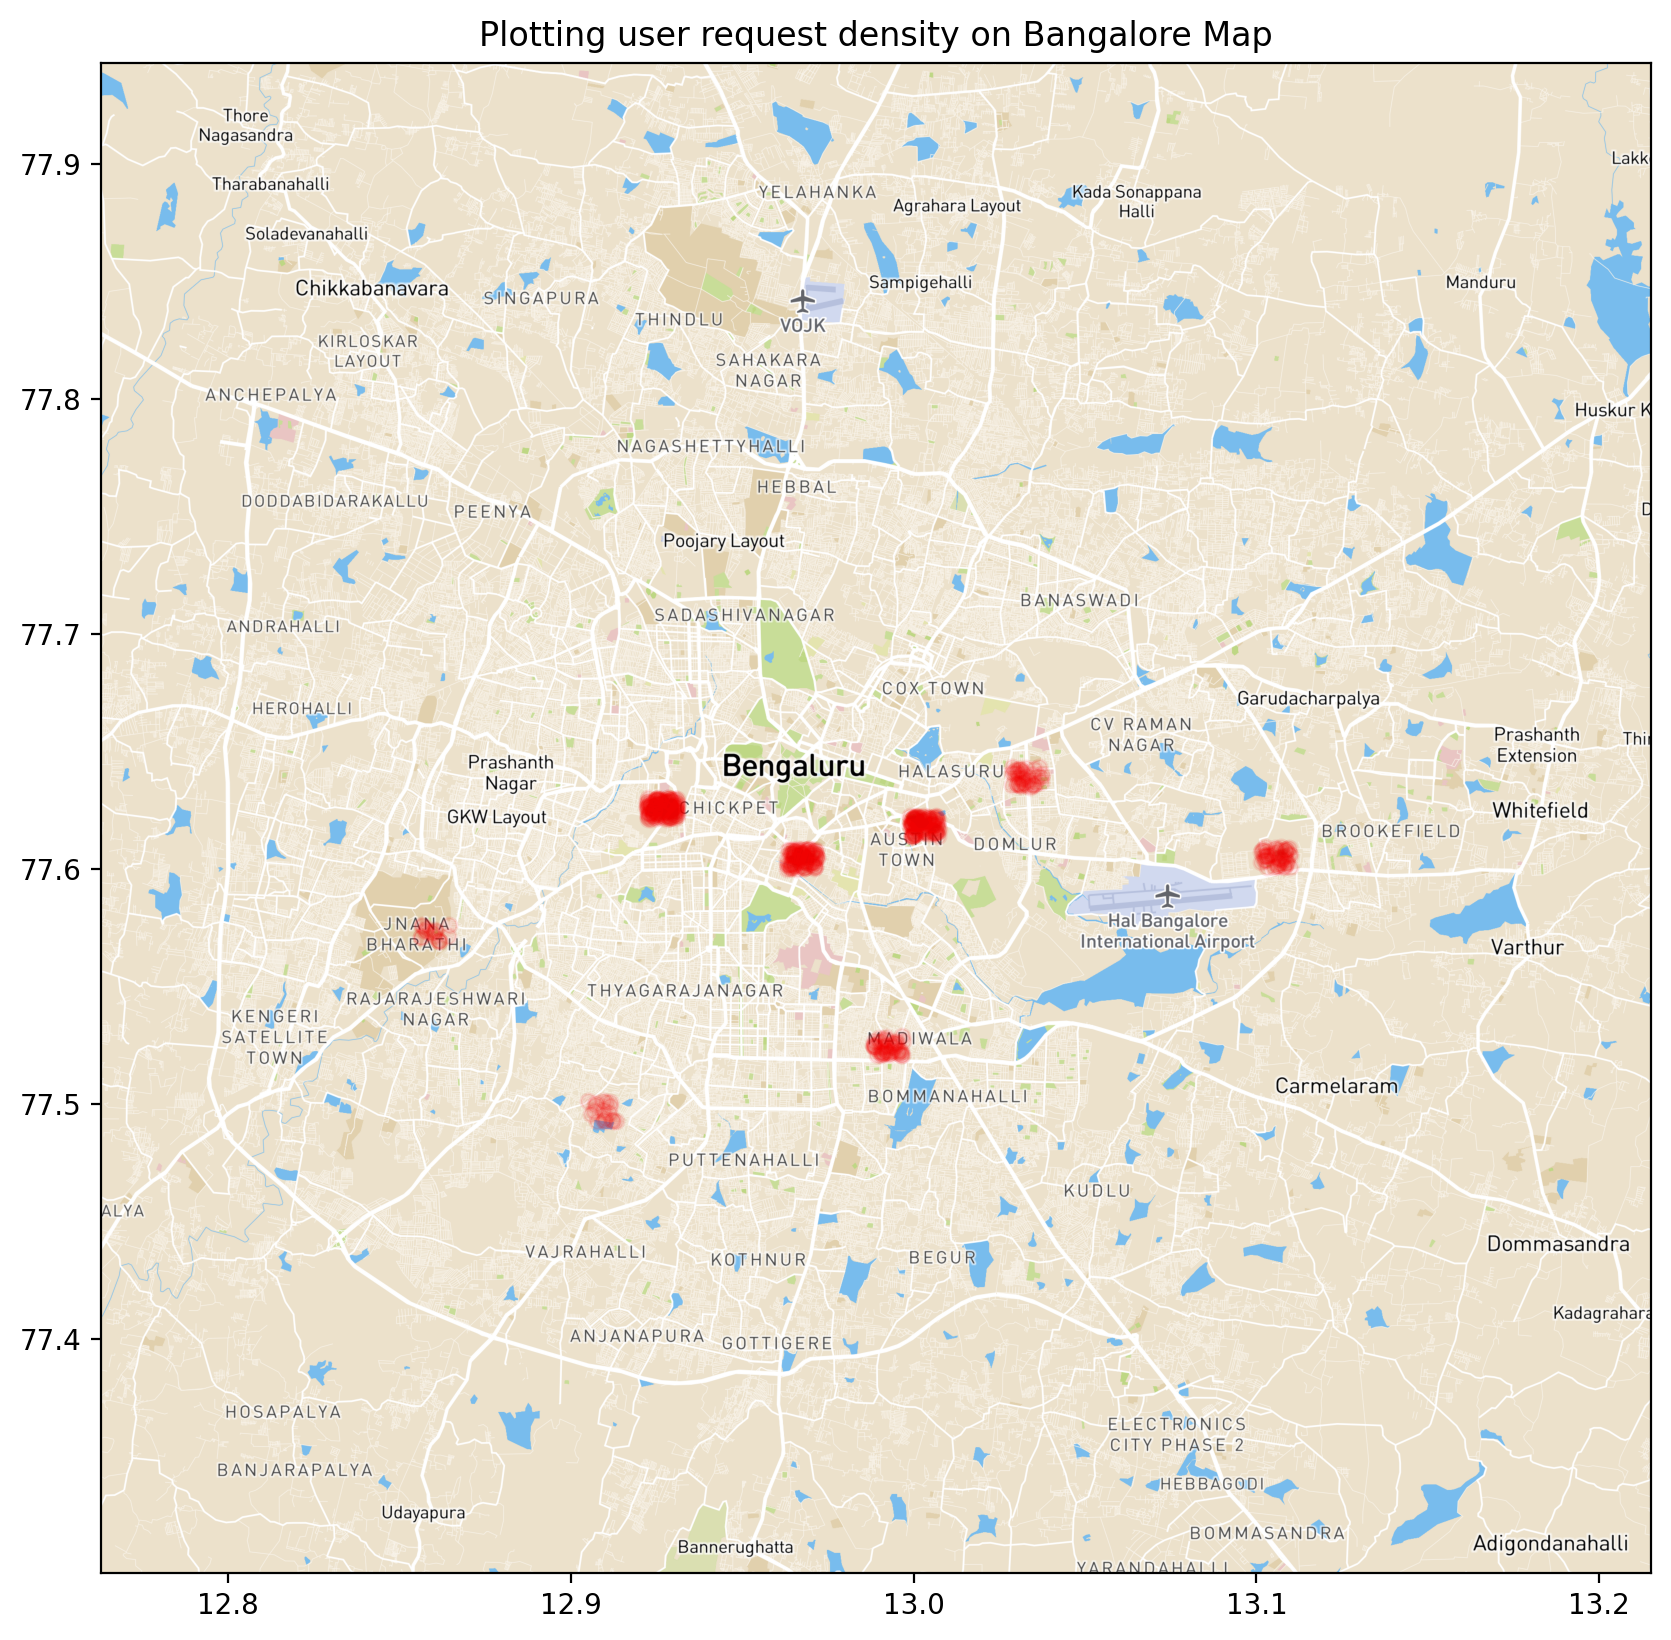

In [3]:
blr_map_box = (12.7629, 13.2152,77.3005, 77.9432)
#todo subplots

start_date = '2021-09-01'
end_date = '2021-09-02'
from_date_str = start_date + "T00:00:00+00:00"
to_date_str = end_date + "T23:59:59+00:00"
from_date = datetime.strptime(from_date_str, '%Y-%m-%dT%H:%M:%S%z')
to_date = datetime.strptime(to_date_str, '%Y-%m-%dT%H:%M:%S%z')

data = db.get_all_data('rides', {'start_time': {'$gte': from_date_str, '$lt': to_date_str}},
                       {'_id': 0, 'start_time': 1, 'start_loc': 1})

locs = list(data)
df = pd.DataFrame(locs)

sf = df['start_loc'].apply(pd.Series)
sf[['x-axis','y-axis']] = pd.DataFrame(sf.coordinates.tolist())
df = df.merge(sf,left_index=True, right_index=True)

x = df['x-axis']
y = df['y-axis']

img = plt.imread('map2.png')
fig, axes = plt.subplots(figsize=(10, 10), dpi=200)

axes.scatter(x, y, zorder=1, alpha=0.1, c='#f00202', s=30)
axes.title.set_text('Plotting user request density on Bangalore Map')
axes.set_xlim([blr_map_box[0], blr_map_box[1]])
axes.set_ylim([blr_map_box[2], blr_map_box[3]])
axes.imshow(img, zorder=0, extent=blr_map_box, aspect='auto')
